# Customer clasification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
df_raw = pd.read_csv('./marketing_campaign.csv', sep='\t')

In [3]:
df_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Explorar y limpiar datos

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df_raw.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df_raw.sort_values(by=['Education', 'Income'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
46,9909,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,...,9,0,0,0,0,0,0,3,11,1
439,456,1986,2n Cycle,Married,7500.0,1,0,07-02-2013,96,1,...,8,0,0,0,0,0,0,3,11,0
2029,10001,1985,2n Cycle,Together,7500.0,1,0,01-08-2012,98,5,...,9,0,0,0,0,0,0,3,11,0
2222,10659,1979,2n Cycle,Together,7500.0,1,0,07-05-2013,7,2,...,7,0,0,0,0,0,0,3,11,0
428,5987,1989,2n Cycle,Together,10404.0,1,0,04-05-2014,52,2,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0
1386,3769,1972,PhD,Together,NaN,1,0,02-03-2014,17,25,...,7,0,0,0,0,0,0,3,11,0


In [7]:
df = df_raw.fillna(method='ffill')
df = df_raw.fillna(method='bfill')

In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
df = df.iloc[:,:10]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173


In [10]:
df.drop(columns=['ID'], inplace=True)

In [11]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173


In [12]:
df.drop_duplicates(inplace=True)

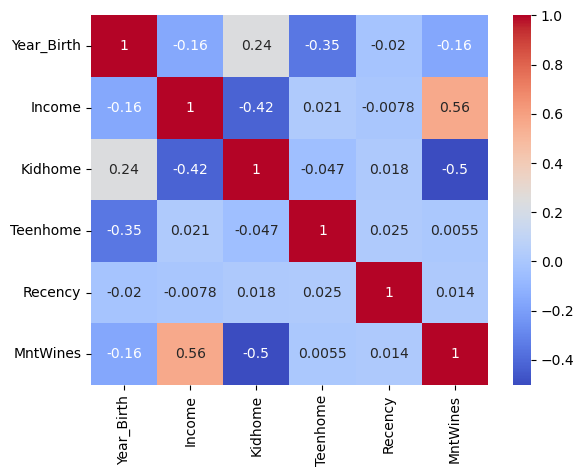

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

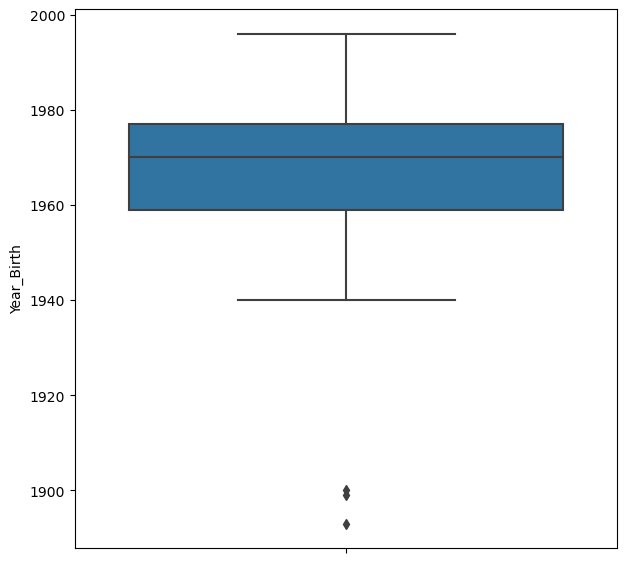

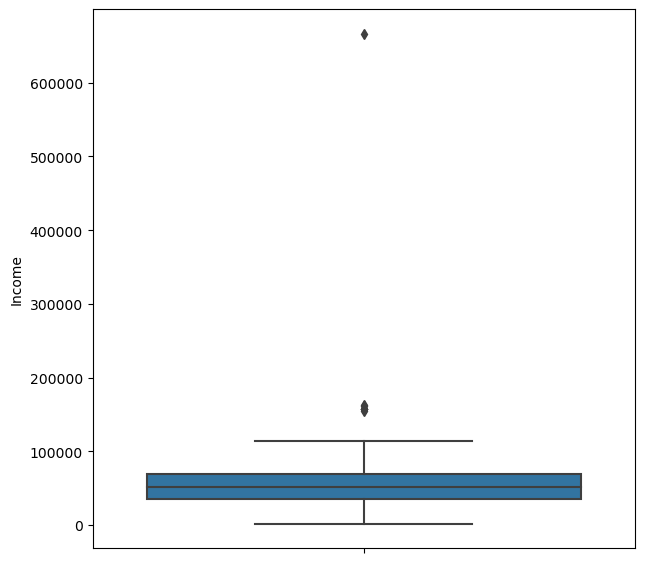

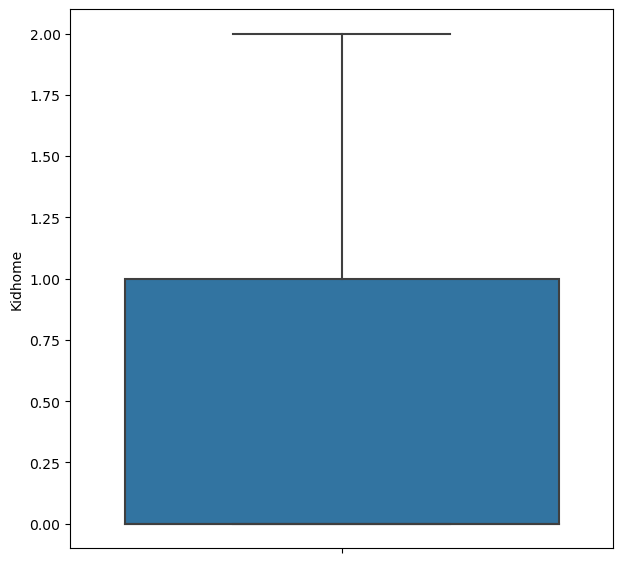

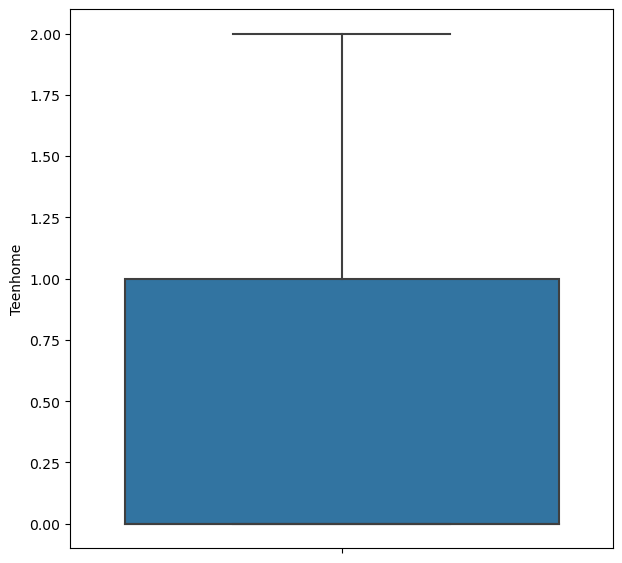

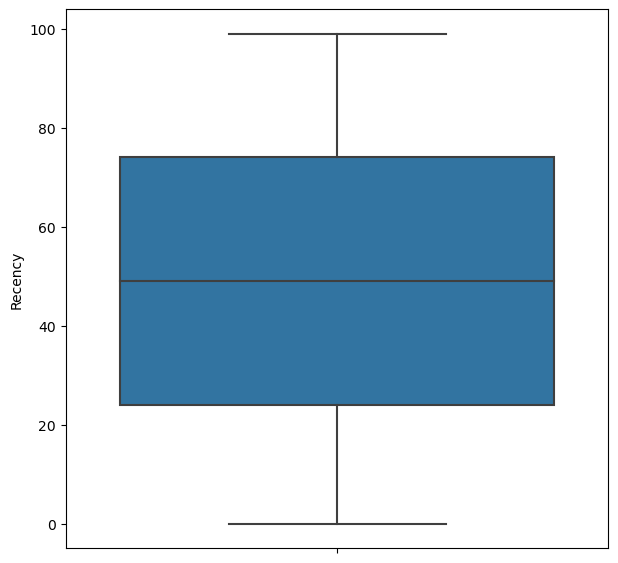

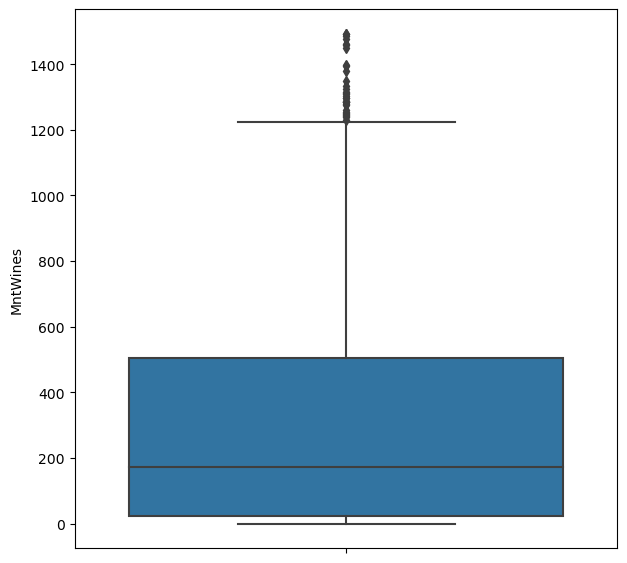

In [14]:
int_cols = df.select_dtypes(exclude='object').columns
for col in int_cols:
    plt.figure(figsize=(7,7))
    sns.boxplot(data = df, y=col)
    plt.show()

#### Remove outliers

A simple vista, el outlier más importante a eliminar es el del income que en realidad podría dificultar la clasificación. El año de nacimiento también presenta Outliers, pero no creo que tenga una gran influencia el año de nacimiento.

In [15]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[ (df[ft]<lower_bound) | (df[ft]>upper_bound) ]
    
    return ls

In [16]:
index_list = []
features = ['Income']
for feature in features:
    index_list.extend(outliers(df, feature))

In [17]:
index_list

[164, 617, 655, 687, 1300, 1653, 2132, 2233]

In [18]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [19]:
df_cl = remove(df, index_list)

In [20]:
df_cl.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173


<AxesSubplot:ylabel='Income'>

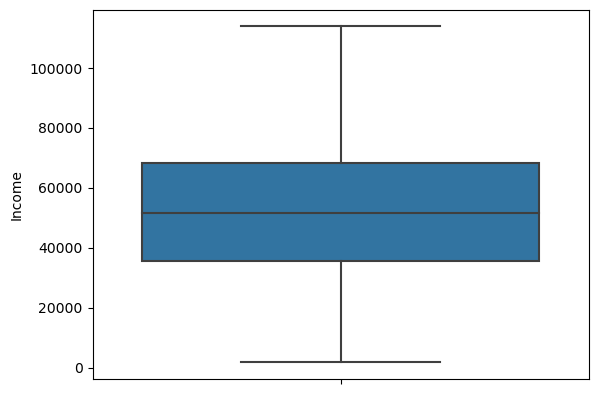

In [21]:
sns.boxplot(data = df_cl, y='Income')

In [22]:
df_cl['Age'] = 2023 - df['Year_Birth']

In [23]:
df_cl.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,66
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,69
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,58
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,39
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,42


In [24]:
df_cl[df_cl['Age']>100]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,Age
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,123
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,130
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,124


In [25]:
df_cl.drop(columns = ['Dt_Customer'], inplace=True)

In [26]:
df_cl

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,Age
0,1957,Graduation,Single,58138.0,0,0,58,635,66
1,1954,Graduation,Single,46344.0,1,1,38,11,69
2,1965,Graduation,Together,71613.0,0,0,26,426,58
3,1984,Graduation,Together,26646.0,1,0,26,11,39
4,1981,PhD,Married,58293.0,1,0,94,173,42
...,...,...,...,...,...,...,...,...,...
2232,1986,Graduation,Single,26816.0,0,0,50,5,37
2235,1967,Graduation,Married,61223.0,0,1,46,709,56
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,42
2238,1956,Master,Together,69245.0,0,1,8,428,67


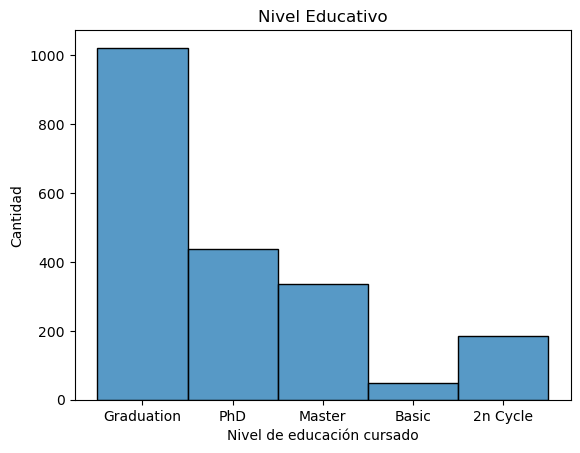

In [27]:
sns.histplot(data=df_cl, x='Education', bins=15)
plt.title('Nivel Educativo')
plt.xlabel('Nivel de educación cursado')
plt.ylabel('Cantidad')
plt.show()

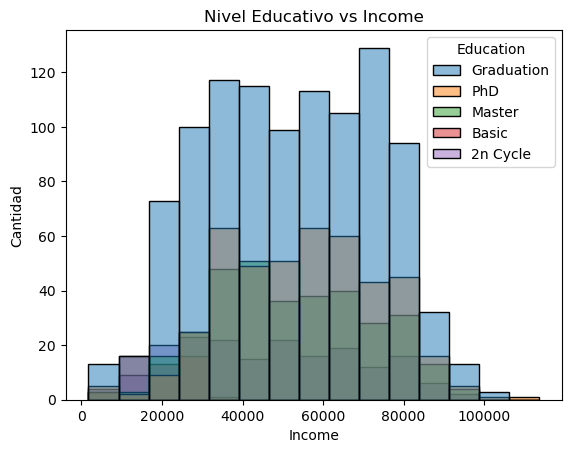

In [28]:
sns.histplot(data=df_cl, x='Income', hue='Education', bins=15)
plt.title('Nivel Educativo vs Income')
plt.xlabel('Income')
plt.ylabel('Cantidad')
plt.show()

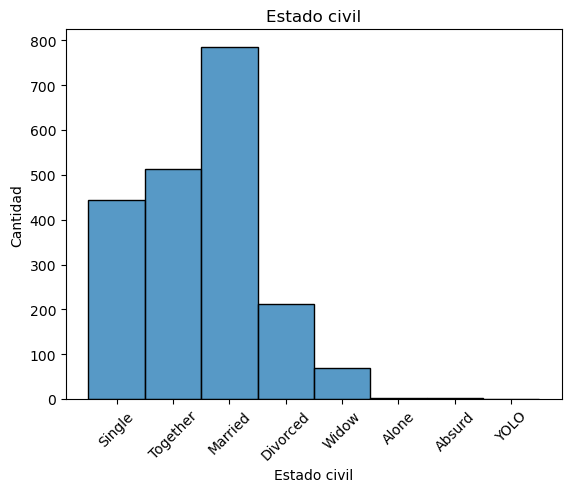

In [29]:
sns.histplot(data=df_cl, x='Marital_Status', bins=15)
plt.title('Estado civil')
plt.xlabel('Estado civil')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.show()

In [35]:
df_cl = pd.get_dummies(df_cl, columns = ['Education','Marital_Status'])
df_cl.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,66,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,69,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,58,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,39,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,42,0,0,0,0,1,0,0,0,1,0,0,0,0


In [36]:
df_cl.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'Age', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [37]:
df_cl.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,66,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,69,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,58,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,39,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,42,0,0,0,0,1,0,0,0,1,0,0,0,0


### Escalar los datos

In [31]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cl)

In [39]:
df_scaled = pd.DataFrame(df_scaled, columns = df_cl.columns)
df_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.980508,0.315945,-0.827488,-0.929901,0.307406,0.984020,0.980508,-0.317511,-0.157234,0.993620,-0.44523,-0.524360,-0.031396,-0.038462,-0.341391,-0.793736,1.887868,-0.581330,-0.188934,-0.022195
1,-1.230780,-0.253037,1.031614,0.898394,-0.383275,-0.873422,1.230780,-0.317511,-0.157234,0.993620,-0.44523,-0.524360,-0.031396,-0.038462,-0.341391,-0.793736,1.887868,-0.581330,-0.188934,-0.022195
2,-0.313117,0.966023,-0.827488,-0.929901,-0.797684,0.361896,0.313117,-0.317511,-0.157234,0.993620,-0.44523,-0.524360,-0.031396,-0.038462,-0.341391,-0.793736,-0.529698,1.720193,-0.188934,-0.022195
3,1.271937,-1.203333,1.031614,-0.929901,-0.797684,-0.873422,-1.271937,-0.317511,-0.157234,0.993620,-0.44523,-0.524360,-0.031396,-0.038462,-0.341391,-0.793736,-0.529698,1.720193,-0.188934,-0.022195
4,1.021665,0.323422,1.031614,-0.929901,1.550632,-0.391201,-1.021665,-0.317511,-0.157234,-1.006421,-0.44523,1.907088,-0.031396,-0.038462,-0.341391,1.259866,-0.529698,-0.581330,-0.188934,-0.022195


### PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA()
pca.fit(df_scaled)
pca_data_scaled = pca.transform(df_scaled)
pca_data_scaled

array([[ 1.13851928e+00, -1.13719781e+00, -1.27179434e+00, ...,
         5.26214583e-17, -1.89607073e-16,  4.68184158e-16],
       [ 2.18714108e-01,  1.31525077e+00, -1.80988900e+00, ...,
         2.19154912e-16, -5.22673981e-16,  5.37573097e-16],
       [ 8.20424189e-01, -1.02517960e+00, -1.15819279e+00, ...,
         4.27321729e-16, -9.19583196e-18,  2.30527042e-16],
       ...,
       [ 1.87583884e-02, -2.25880781e+00, -1.02158862e+00, ...,
        -1.62484253e-16,  3.09993288e-16, -4.96322095e-16],
       [ 2.18362456e+00,  8.66463532e-01,  7.38376815e-01, ...,
         5.93855183e-16, -4.53285042e-16,  2.99915981e-16],
       [ 1.11893891e+00,  1.98015350e+00,  1.09081852e+00, ...,
        -4.12284433e-16,  1.98970985e-16,  2.11445083e-16]])

In [42]:
var = pca.explained_variance_ratio_
print(var)

[1.43648315e-01 8.93083810e-02 7.99803751e-02 7.51780826e-02
 6.55688170e-02 6.13050307e-02 5.78482114e-02 5.44640568e-02
 5.19645158e-02 5.12352219e-02 5.01347539e-02 4.96354137e-02
 4.78380485e-02 4.68778960e-02 3.71013857e-02 2.48879105e-02
 1.30235843e-02 1.43246023e-32 5.77529911e-33 8.90670593e-34]


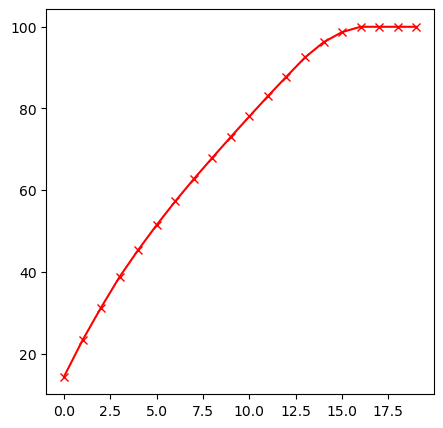

In [43]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(5,5))
plt.plot(cum_var, 'r-x')
plt.show()

In [44]:
len(var)

20

In [45]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([14,15,16,17,18,19], axis=1, inplace=True)

In [47]:
pca_data_standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.138519,-1.137198,-1.271794,-0.921244,1.565686,-0.714872,-0.507963,-0.544337,-0.280497,-0.449035,0.200264,0.055328,-0.363467,0.465309
1,0.218714,1.315251,-1.809889,-0.549146,1.852477,-0.585465,-0.515332,-0.153332,-0.021025,-1.196751,0.317089,0.432579,-0.692966,-0.163404
2,0.820424,-1.025180,-1.158193,-1.112373,-1.424765,0.469815,-0.548867,-0.204414,0.823038,0.145363,0.151393,-0.373917,-0.667426,-0.263252
3,-2.612026,-0.014163,-1.020843,-1.020575,-1.410532,0.797677,-0.509189,0.375232,0.770464,0.113425,-0.047667,-0.148549,-0.102348,-0.933814
4,-1.172022,-0.412831,1.817247,1.263522,0.305005,1.461673,-0.400493,0.640241,-1.373846,0.430592,-0.531117,0.344470,1.096993,-0.006327


## Clustering

In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### KMEANS 

In [49]:
sum_squared_distances = []
silhouette_scores = []
K = range(2,25)
for k in K:
    km = KMeans(n_clusters=k)
    y = km.fit_predict(pca_data_standard)
    sum_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y))

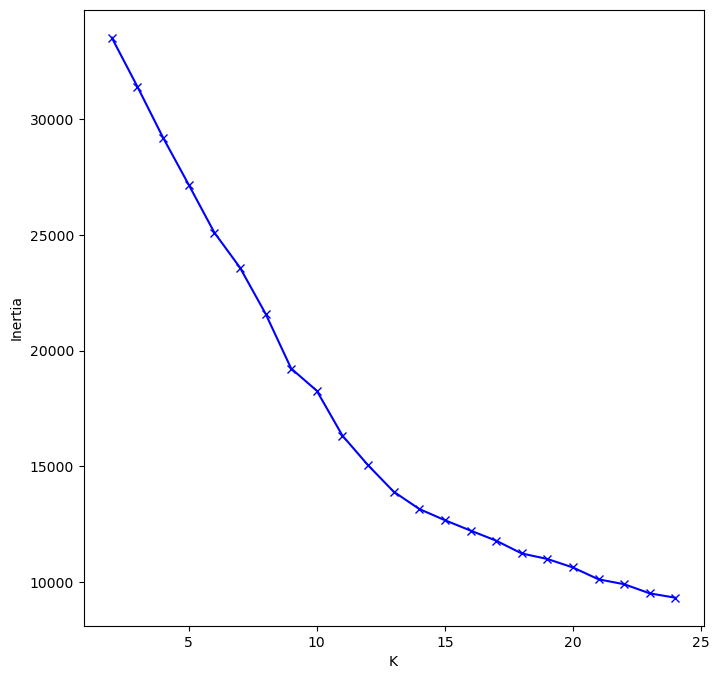

In [50]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

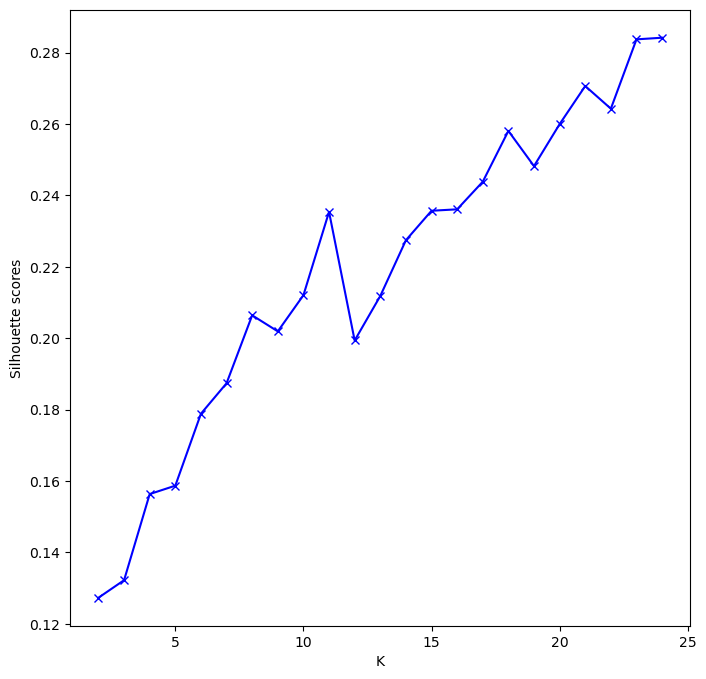

In [51]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette scores')
plt.show()

In [52]:
sum_squared_distances = []
silhouette_scores = []
K = range(2,25)
for k in K:
    km = KMeans(n_clusters=k)
    y = km.fit_predict(df_scaled)
    sum_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, y))

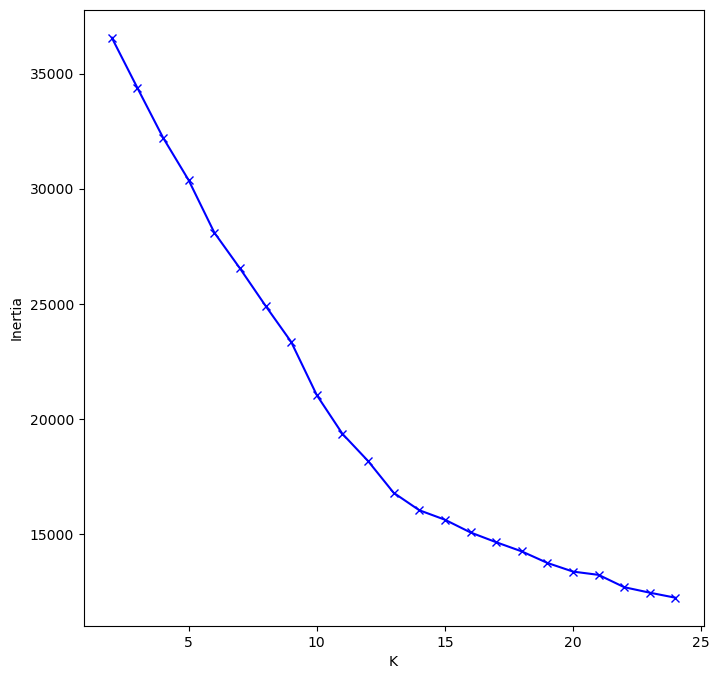

In [53]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

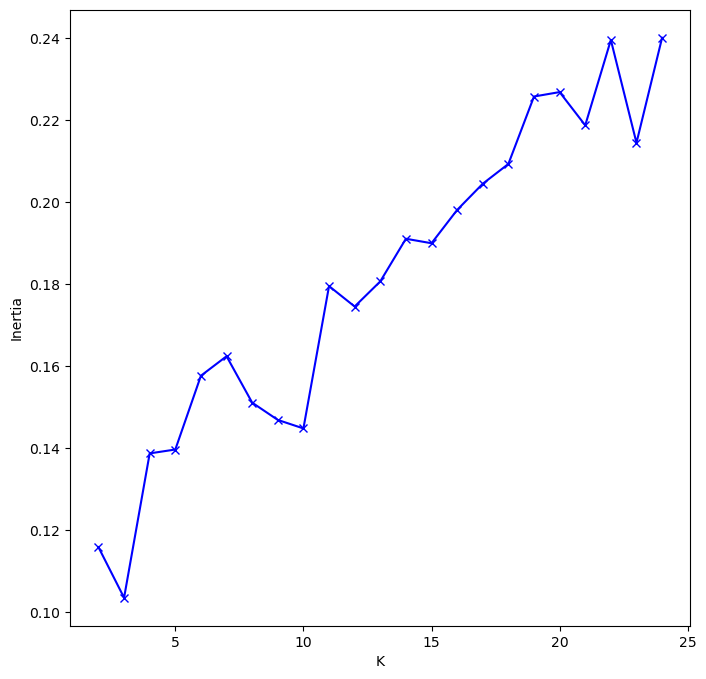

In [54]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [61]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(df_cl)
print(silhouette_score(df_cl, y))
df_cl['K-Mean_cluster'] = y

0.5383214125505957


In [63]:
df_cl.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'Age', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'K-Mean_clsuter', 'K-Mean_cluster'],
      dtype='object')

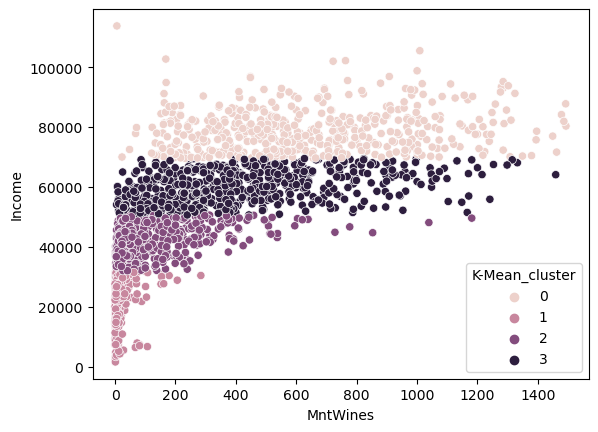

In [70]:
sns.scatterplot(data=df_cl, x='MntWines', y='Income', hue='K-Mean_cluster')
plt.show()

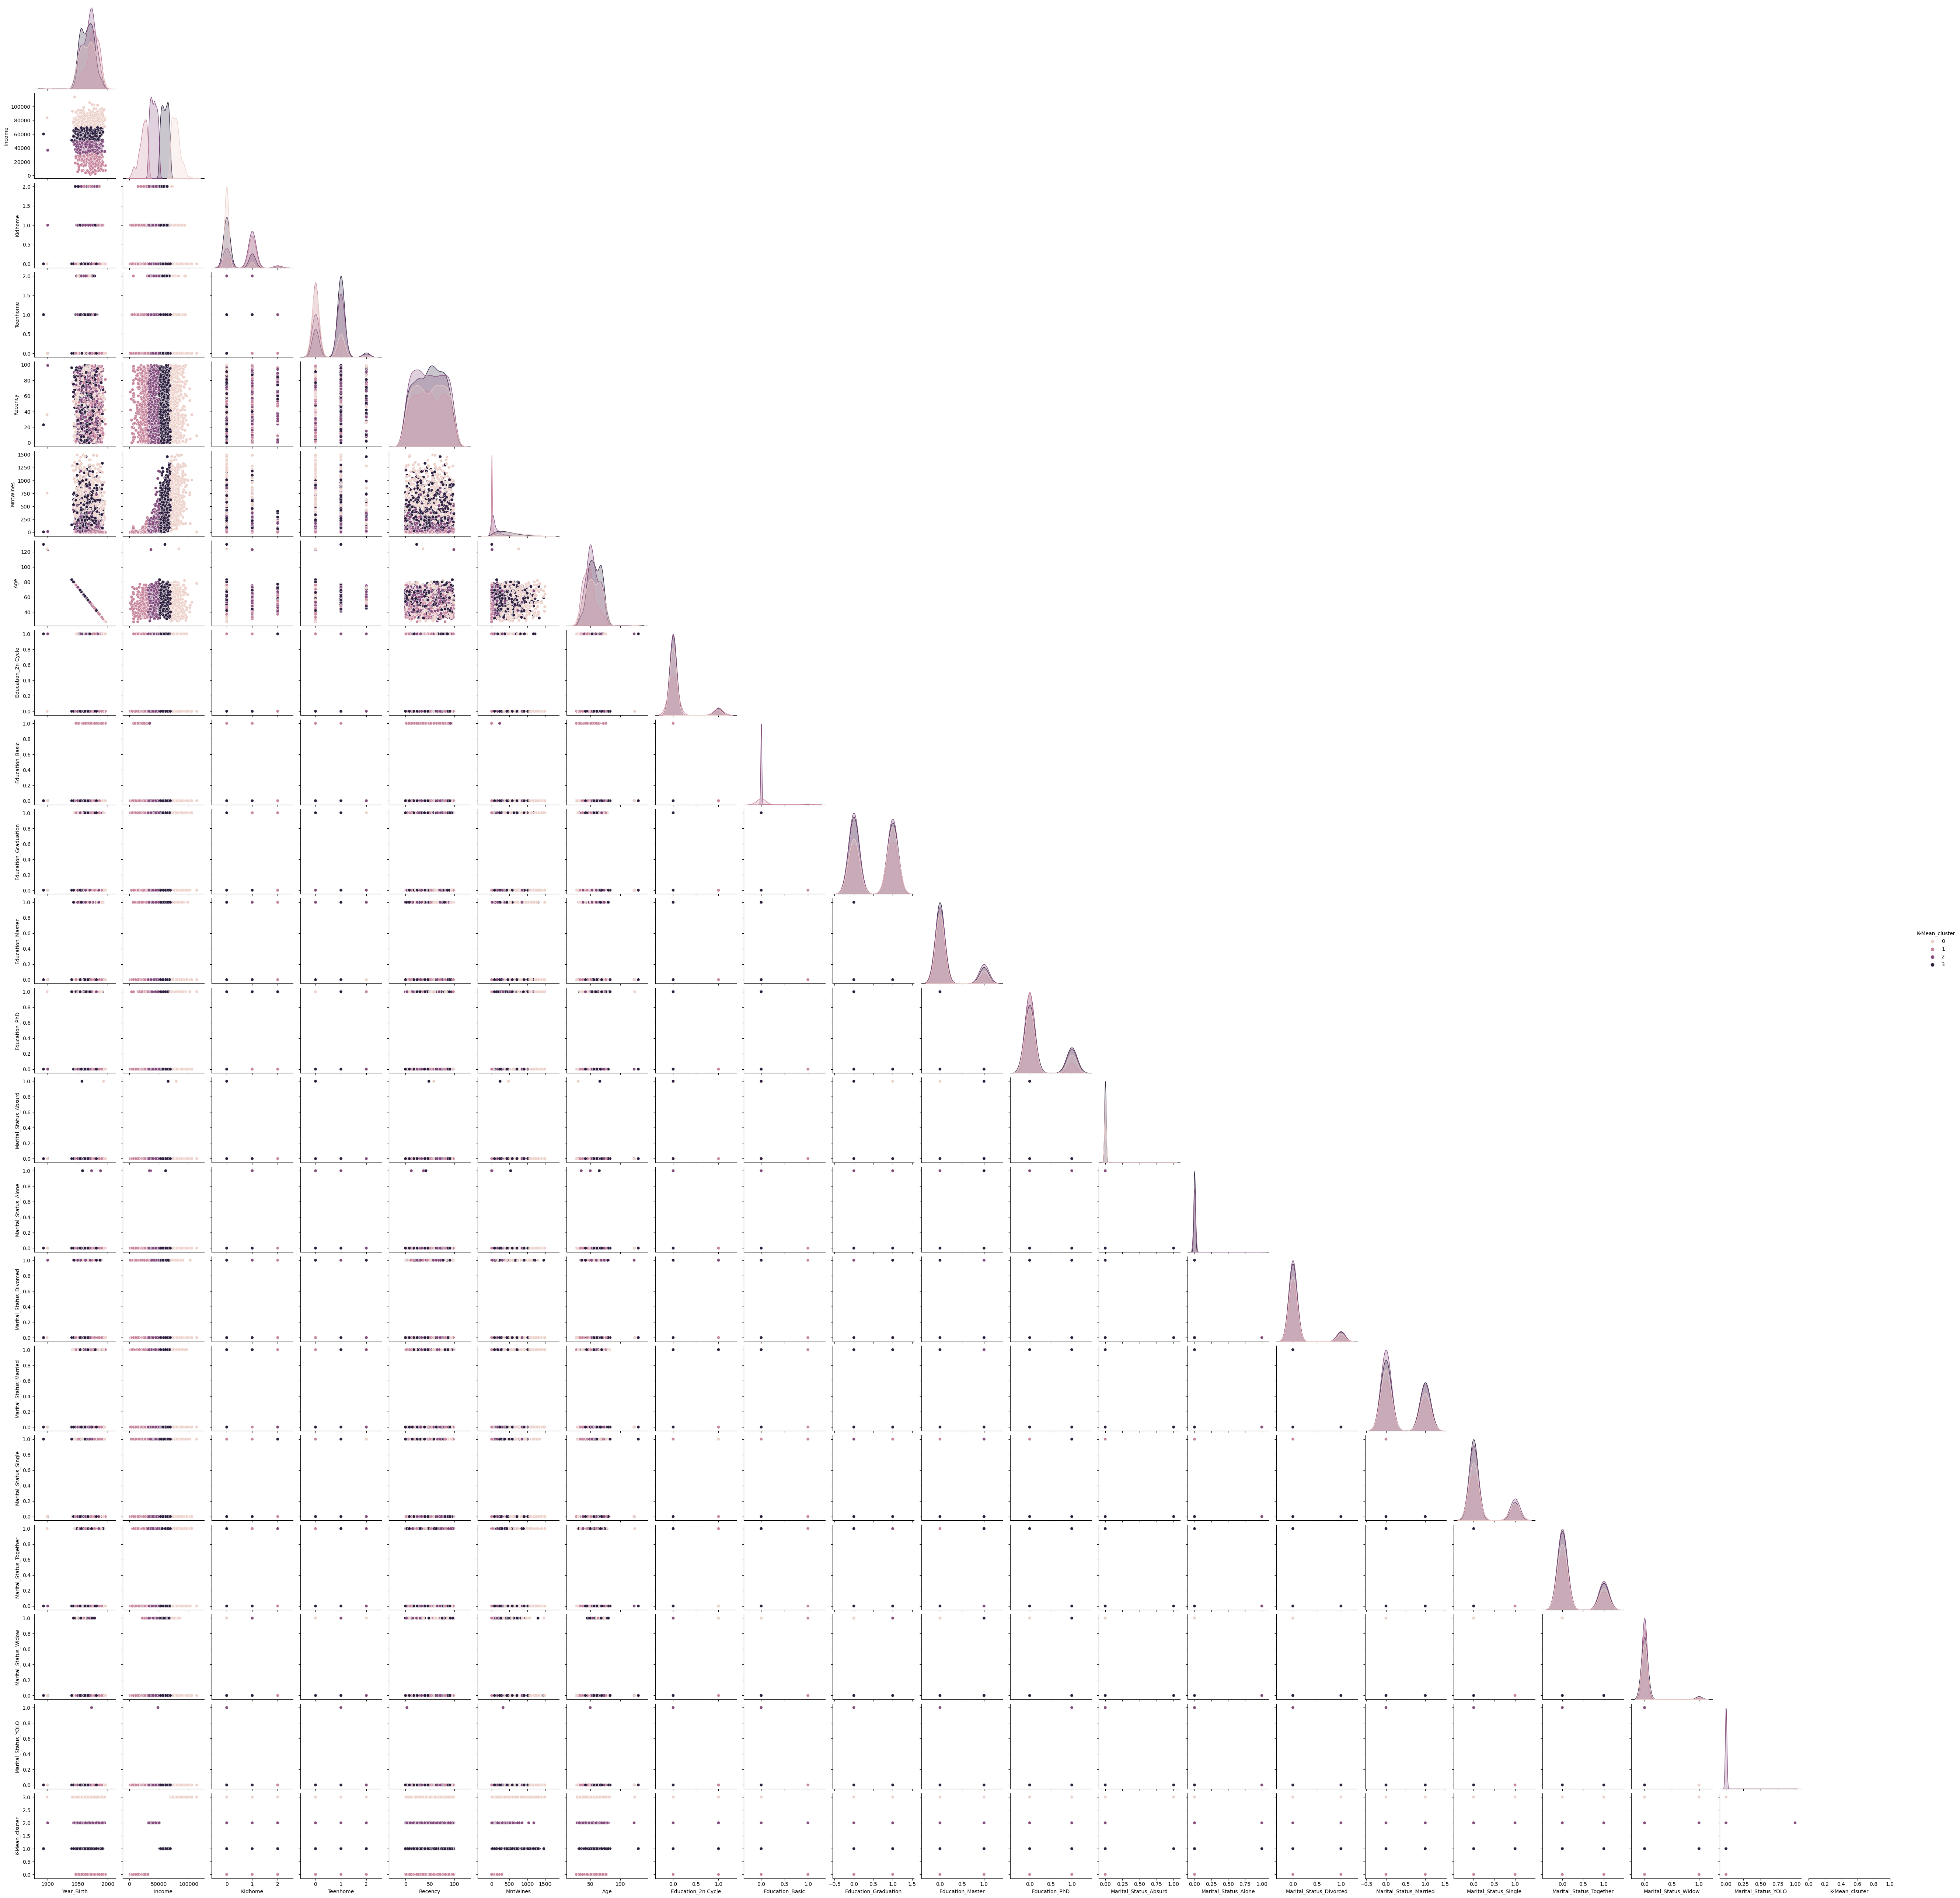

In [62]:
sns.pairplot(data=df_cl, hue='K-Mean_cluster', corner = True)
plt.show()

### Agglomerative Clustering

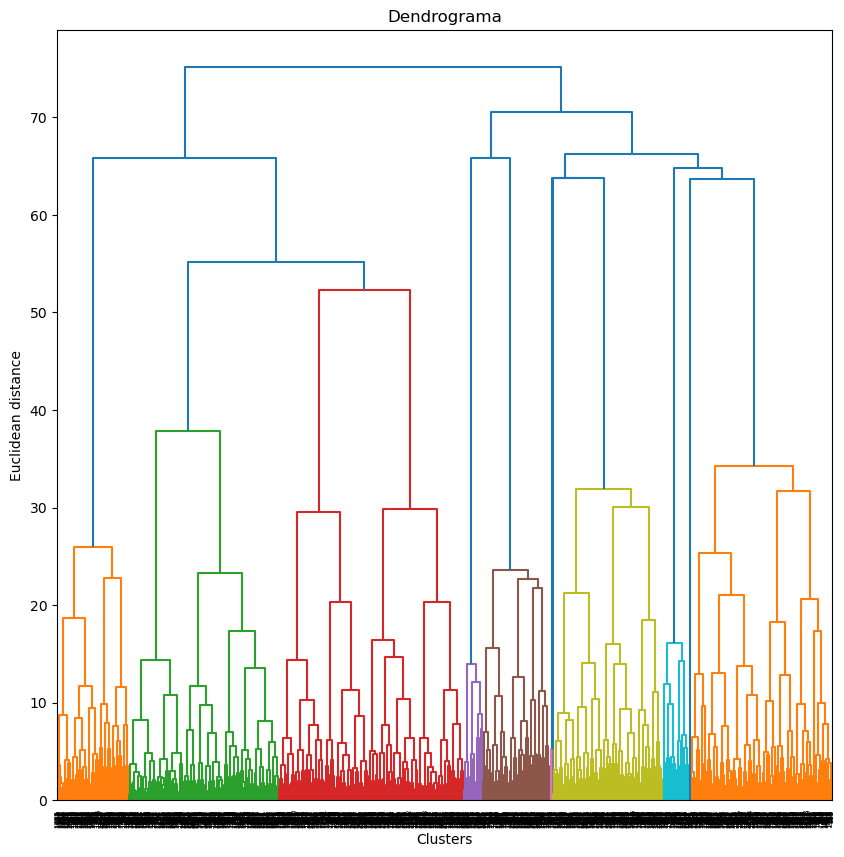

In [71]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

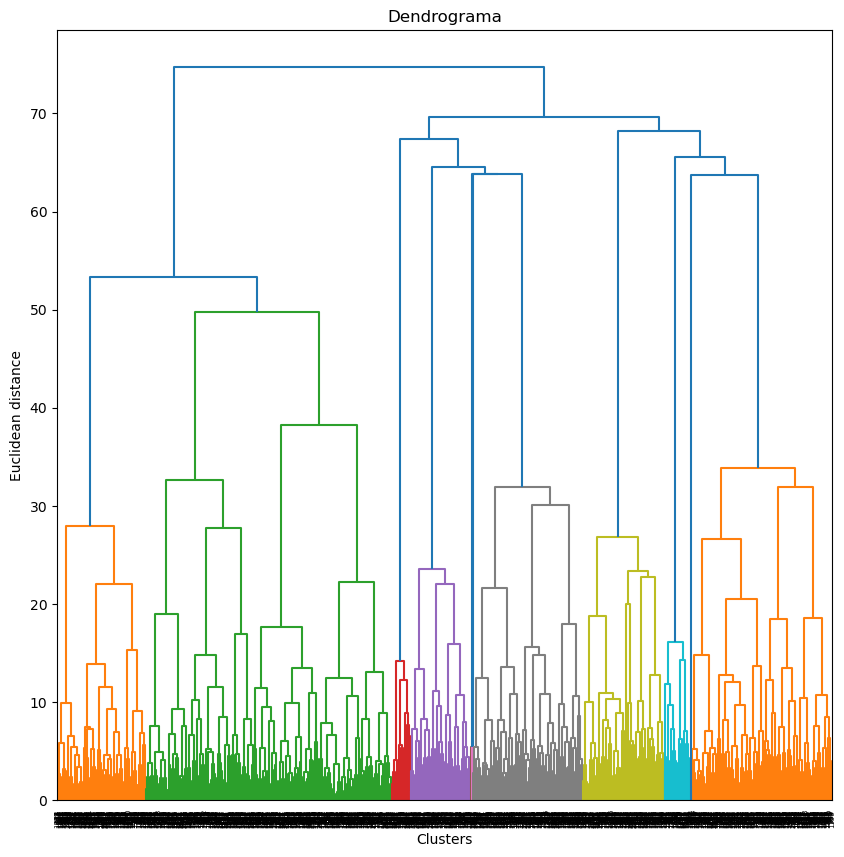

In [100]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_scaled, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [101]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
df_cl['Cluster'] = y_hc

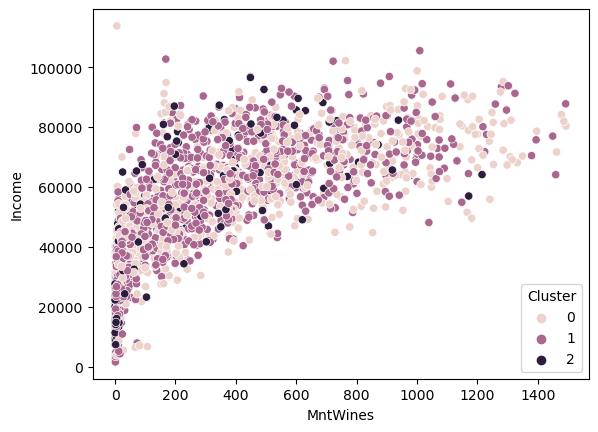

In [102]:
sns.scatterplot(data=df_cl, x='MntWines', y='Income', hue='Cluster')
plt.show()